# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

## Содержание методического пособия:


<ol>
<li>Что такое TensorFlow</li>
<li>Основы синтаксиса TensorFlow</li>
<li>Пример нейросети на TensorFlow</li>
</ol>

## Что такое TensorFlow

TensorFlow - это фреймворк для создания ML моделей. TensorFlow предназначен в первую очередь для Deep Learning, т.е. создания современных нейросетей. Однако в TensorFlow также есть поддержка некоторых классических ML алгоритмов: K-means clustering, Random Forests, Support Vector Machines, Gaussian Mixture Model clustering, Linear/logistic regression.

TensorFlow выпустила компания Google в 2015. TensorFlow - это opensource проект. На данный момент это один из основных инструментов для создания нейросетей в рабочих целях. TensorFlow позволяет создавать нейронные сети как для кластеров из большого количества вычислительных устройств, так и для устройств с относительно небольшой вычислитей мощностью, таких как смартфоны и одноплатные компьютеры.

TensorFlow применяется самой компанией Google для ее поиска, почты, переводчика, распознования голоса, внутренних нужд наподобие мониторинга оборудования. TensorFlow используется различными компаниями для различных проектов связанных с компьютерным зрением, решением задач ранжирования и т.д.


## Основы синтаксиса TensorFlow

Процесс создания нейросети на TensorFlow схож с разобранным нами процессом обучения нейросети на Keras. Отличее здесь в том, что здесь нам нужно прописать больше деталей в коде. 

Название TensorFlow означает поток тензоров. Тензоры - это массивы. Данные в компьютере предствлены часто в виде массивах и работа с этими массивами подразумевает их преобразования. Преобразования осуществляются через, к примеру, математические операции. Работа TensorFlow складывается из цепочки преобразований тензоров, т.е. данных. Сами операции осуществляющие преобразование данных представлены в TensorFlow в виде графов. Особенностью TensorFlow версии 1 является то, что сначала необходимо декларировать переменные и вычисления, которые будут совершенны над ними, а потом уже непосредственно запускать работу над данными. 

Давайте рассмотрим базовые вещи в синтаксисе Tensorflow 2.

Выведем строку Hello world, а также версию tensorflow

In [1]:
#!pip install --upgrade pip
#!pip install tensorflow
#!pip install tf-nightly

In [88]:
%tensorflow_version 2.x

In [89]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.6.0
TensorFlow 2.0 Hello World


Пример создания тензора - 

In [90]:
A = tf.constant( [[3, 2], 
                 [5, 2]])

print(A)

tf.Tensor(
[[3 2]
 [5 2]], shape=(2, 2), dtype=int32)


In [91]:
w = tf.Variable([[1.], [2.]])
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>

Тензор, заполненный только единицами

In [93]:
x = tf.ones(shape=(3, 2))
print(x)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


Тензор, заполненный только нулями:

In [94]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Cлучайные тензоры

In [95]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.24421403]
 [-1.0366124 ]
 [ 0.5802136 ]], shape=(3, 1), dtype=float32)


In [96]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.1264924 ],
       [ 0.9418226 ],
       [ 0.16077602]], dtype=float32)>


Состояние переменной можно изменить с помощью метода assign

In [97]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [11]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Пример изменения размерности тензора - 

In [98]:
tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])

resh_tensor = tf.reshape(tensor = tensor, shape = [1, 8]) 

print(f'BEFORE {tensor.numpy()}')
print(f'AFTER {resh_tensor.numpy()}')

BEFORE [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER [[3 2 5 2 9 5 1 3]]


Пример сложения тензеров - 

In [100]:
B = tf.constant([[9, 5], 
                 [1, 3]])

AB = tf.concat(values=[A, B], axis=0)
print(AB.numpy())

[[3 2]
 [5 2]
 [9 5]
 [1 3]]


Для переменных можно еще и так (добавить к тому. что есть)

In [101]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>

Пример умножения матриц, одной из самых частых операций в машинном обучении - 

In [102]:
A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[10, 10],
                 [1000, 1000]])

AB = tf.multiply(A, B)
print(AB)


tf.Tensor(
[[  30   70]
 [1000 9000]], shape=(2, 2), dtype=int32)


In [103]:
x = tf.matmul([[5]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[10 15]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


Можно много всякого похожего на numpy

In [104]:
a = tf.ones((2, 2)) * 2
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(a)
print(c)
d = b + c
print(d)
e = tf.matmul(a, b)
print(e)
e *= d
print(e)



tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.4142135 1.4142135]
 [1.4142135 1.4142135]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5.4142137 5.4142137]
 [5.4142137 5.4142137]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[86.62742 86.62742]
 [86.62742 86.62742]], shape=(2, 2), dtype=float32)


In [105]:
import numpy as np

ndarray = np.ones([3, 3])

print("превратим numpy arrays в Tensors ")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("добавим к тензору 1 ")
print(np.add(tensor, 1))

print(" .numpy() превратим тензор в  numpy array")
print(tensor.numpy())

превратим numpy arrays в Tensors 
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
добавим к тензору 1 
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
 .numpy() превратим тензор в  numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


Проверяем работу GPU

https://www.tensorflow.org/guide/gpu

In [106]:
x = tf.random.uniform([3, 3])

print("есть ли доступные GPU: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("тензор на GPU #0:  "),
print(x.device.endswith('GPU:0'))


есть ли доступные GPU: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
тензор на GPU #0:  
True


Сделаем по 10 циклов на GPU и CPU:

In [107]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.matmul(x, x)

  result = time.time()-start

  print("10 циклов: {:0.2f}ms".format(1000*result))

# исполнение CPU
print(" CPU работает:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# исполнение на GPU #0 , если доступен
if tf.config.experimental.list_physical_devices("GPU"):
  print(" какой GPU:")
  with tf.device("GPU:0"): # или GPU:1 , для 2х GPU, GPU:2 для 3х  и т.д.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

 CPU работает:
10 циклов: 324.46ms
 какой GPU:
10 циклов: 2.19ms


ГЛАВНЫЙ ФОКУС!!!
Вычисляем производные (для дифференцируемых функций)

In [21]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

print('input_var : ',input_var)
print('result = input_var^2 : ',result)
print('gradient : ',gradient)


input_var :  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
result = input_var^2 :  tf.Tensor(9.0, shape=(), dtype=float32)
gradient :  tf.Tensor(6.0, shape=(), dtype=float32)


Производная второго порядка:

In [108]:
import numpy as np
import matplotlib.pyplot as plt

input_t = tf.Variable(np.arange(10), dtype='float32') # t
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    x =  4.9 * input_t ** 2  # g * t^2 /2
  speed = inner_tape.gradient( x, input_t)  # g * t
acceleration = outer_tape.gradient(speed, input_t)   # g 


print('x : ',x)
print('t : ',input_t)
print('v : ',speed)
print('a : ',acceleration)

x :  tf.Tensor(
[  0.         4.9       19.6       44.100002  78.4      122.49999
 176.40001  240.09999  313.6      396.9     ], shape=(10,), dtype=float32)
t :  <tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)>
v :  tf.Tensor(
[ 0.        9.8      19.6      29.400002 39.2      49.       58.800003
 68.600006 78.4      88.200005], shape=(10,), dtype=float32)
a :  tf.Tensor([9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8], shape=(10,), dtype=float32)


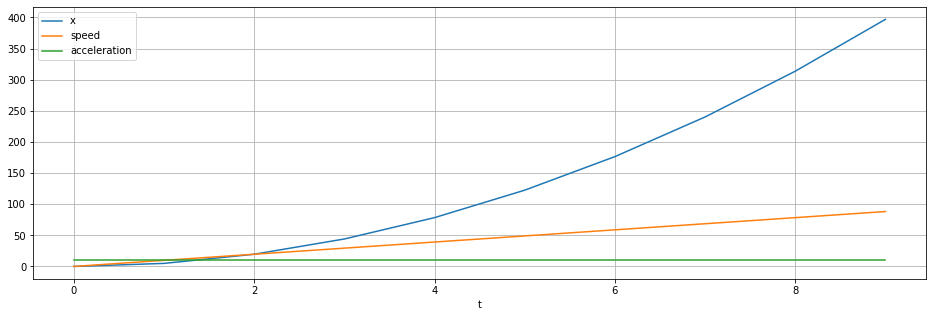

In [109]:
plt.figure(figsize=(16,5))
plt.plot(input_t.numpy(), x.numpy(), label = 'x')
plt.plot(input_t.numpy(), speed.numpy(), label = 'speed')
plt.plot(input_t.numpy(), acceleration.numpy(), label = 'acceleration')
plt.legend()
plt.xlabel('t')
plt.grid('on')
plt.show()

В отличие от графического процессора, использование TPU требует явного подключения к работнику TPU. Поэтому необходимо настроить свое обучение и определение логического вывода, чтобы наблюдать ускорение

пример работы с TPU на будущее

https://www.tensorflow.org/guide/tpu

https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/shakespeare_with_tpu_and_keras.ipynb

Функции tensorflow призваны ускорить вычисления, давайте посмотрим на следующий пример - 

In [110]:
from tensorflow.keras.datasets import mnist


(train_images,train_labels),(test_images,testn_labels)=mnist.load_data()

# Нормализация.
train_images = (train_images / 255) * 2 - 1
test_images = (test_images / 255) * 2 - 1

# векторизация.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)



(60000, 784)
(10000, 784)


In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [112]:
import matplotlib.pyplot as plt


In [113]:
bigger_model = Sequential([
    Dense( 512, activation='relu', input_shape=(784,)),
    Dense(512, activation='linear'),
    Dense(10, activation='softmax')
])

bigger_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

bigger_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [114]:
bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
                                  epochs=1,
                                  batch_size=2000, validation_split=0.2)

24/24 [==============================] - 1s 21ms/step - loss: 1.1511 - accuracy: 0.6707 - val_loss: 0.3700 - val_accuracy: 0.8885


Работа на GPU и СPU



Строго GPU:

In [115]:
print("On GPU:")
with tf.device("GPU:0"):
  
  bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
  epochs=2,
  batch_size=2000, validation_split=0.2)

On GPU:
Epoch 1/2
24/24 [==============================] - 0s 16ms/step - loss: 0.3409 - accuracy: 0.8972 - val_loss: 0.2622 - val_accuracy: 0.9195
Epoch 2/2
24/24 [==============================] - 0s 12ms/step - loss: 0.2435 - accuracy: 0.9282 - val_loss: 0.2070 - val_accuracy: 0.9408


Строго CPU:

In [116]:
print("On CPU:")
with tf.device("CPU:0"):
  
  bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
  epochs=2,
  batch_size=2000, validation_split=0.2)


On CPU:
Epoch 1/2
24/24 [==============================] - 3s 123ms/step - loss: 0.1935 - accuracy: 0.9433 - val_loss: 0.1724 - val_accuracy: 0.9496
Epoch 2/2
24/24 [==============================] - 3s 117ms/step - loss: 0.1596 - accuracy: 0.9530 - val_loss: 0.1471 - val_accuracy: 0.9580


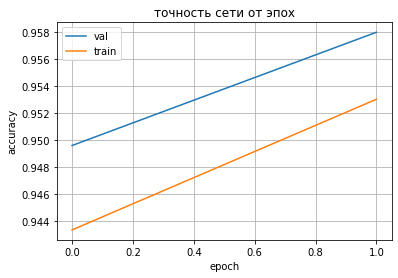

In [117]:
plt.plot(bigger_history.history['val_accuracy'] ,label='val')
plt.plot(bigger_history.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

Выбрать из возможностей CPU/GPU

In [118]:
# исполнение на GPU #0 , если доступен
if tf.config.experimental.list_physical_devices("GPU"):
  print("  GPU:")
  with tf.device("GPU:0"): # или GPU:1 , для 2х GPU, GPU:2 для 3х  и т.д.
    
    bigger_model.fit( train_images, to_categorical(train_labels,10), epochs=1,batch_size=2000, validation_split=0.2)

  GPU:
24/24 [==============================] - 0s 15ms/step - loss: 0.1315 - accuracy: 0.9623 - val_loss: 0.1311 - val_accuracy: 0.9626


In [119]:
bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
                                  epochs=1,
                                  batch_size=200, validation_split=0.2)

240/240 [==============================] - 2s 6ms/step - loss: 0.1601 - accuracy: 0.9509 - val_loss: 0.1409 - val_accuracy: 0.9585


Построим еще моделей

In [120]:
bigger_model2 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(512, activation='linear'),
    Dense(10, activation='softmax')
])

bigger_model2.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

bigger_history2 = bigger_model2.fit( train_images, to_categorical(train_labels,10),
  epochs=5,
  batch_size=2000, validation_split=0.2
)

Epoch 1/5
24/24 [==============================] - 1s 29ms/step - loss: 1.3457 - accuracy: 0.6419 - val_loss: 0.4196 - val_accuracy: 0.8722
Epoch 2/5
24/24 [==============================] - 0s 13ms/step - loss: 0.3728 - accuracy: 0.8894 - val_loss: 0.2807 - val_accuracy: 0.9183
Epoch 3/5
24/24 [==============================] - 0s 11ms/step - loss: 0.2630 - accuracy: 0.9235 - val_loss: 0.2141 - val_accuracy: 0.9402
Epoch 4/5
24/24 [==============================] - 0s 10ms/step - loss: 0.2060 - accuracy: 0.9403 - val_loss: 0.1765 - val_accuracy: 0.9503
Epoch 5/5
24/24 [==============================] - 0s 11ms/step - loss: 0.1690 - accuracy: 0.9510 - val_loss: 0.1541 - val_accuracy: 0.9561


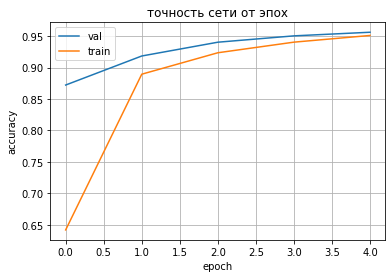

In [121]:
plt.plot(bigger_history2.history['val_accuracy'] ,label='val')
plt.plot(bigger_history2.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

И еще одну

In [122]:
bigger_history3 = bigger_model2.fit( train_images, to_categorical(train_labels,10),
  epochs=5,
  batch_size=2000, validation_split=0.2
)

Epoch 1/5
24/24 [==============================] - 0s 16ms/step - loss: 0.1444 - accuracy: 0.9575 - val_loss: 0.1404 - val_accuracy: 0.9603
Epoch 2/5
24/24 [==============================] - 0s 12ms/step - loss: 0.1256 - accuracy: 0.9636 - val_loss: 0.1249 - val_accuracy: 0.9636
Epoch 3/5
24/24 [==============================] - 0s 12ms/step - loss: 0.1081 - accuracy: 0.9678 - val_loss: 0.1218 - val_accuracy: 0.9633
Epoch 4/5
24/24 [==============================] - 0s 13ms/step - loss: 0.0970 - accuracy: 0.9708 - val_loss: 0.1090 - val_accuracy: 0.9692
Epoch 5/5
24/24 [==============================] - 0s 12ms/step - loss: 0.0834 - accuracy: 0.9754 - val_loss: 0.0983 - val_accuracy: 0.9712


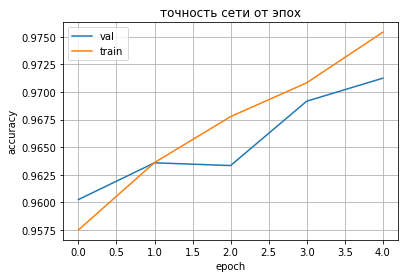

In [123]:
plt.plot(bigger_history3.history['val_accuracy'] ,label='val')
plt.plot(bigger_history3.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

In [124]:
bigger_history3 = bigger_model2.fit( train_images, to_categorical(train_labels,10),
  epochs=15,
  batch_size=2000, validation_split=0.2
)

Epoch 1/15
24/24 [==============================] - 0s 14ms/step - loss: 0.0749 - accuracy: 0.9783 - val_loss: 0.0989 - val_accuracy: 0.9710
Epoch 2/15
24/24 [==============================] - 0s 11ms/step - loss: 0.0679 - accuracy: 0.9801 - val_loss: 0.0947 - val_accuracy: 0.9719
Epoch 3/15
24/24 [==============================] - 0s 10ms/step - loss: 0.0625 - accuracy: 0.9818 - val_loss: 0.0917 - val_accuracy: 0.9726
Epoch 4/15
24/24 [==============================] - 0s 11ms/step - loss: 0.0556 - accuracy: 0.9840 - val_loss: 0.0881 - val_accuracy: 0.9743
Epoch 5/15
24/24 [==============================] - 0s 10ms/step - loss: 0.0504 - accuracy: 0.9853 - val_loss: 0.0868 - val_accuracy: 0.9751
Epoch 6/15
24/24 [==============================] - 0s 10ms/step - loss: 0.0444 - accuracy: 0.9877 - val_loss: 0.0845 - val_accuracy: 0.9748
Epoch 7/15
24/24 [==============================] - 0s 12ms/step - loss: 0.0401 - accuracy: 0.9889 - val_loss: 0.0841 - val_accuracy: 0.9747
Epoch 8/15
24

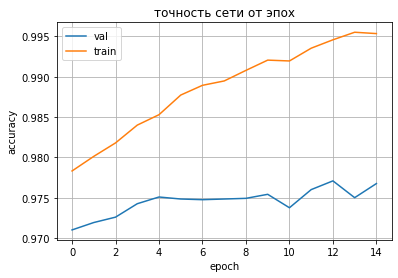

In [125]:
plt.plot(bigger_history3.history['val_accuracy'] ,label='val')
plt.plot(bigger_history3.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

### Оптимизаторы

In [126]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

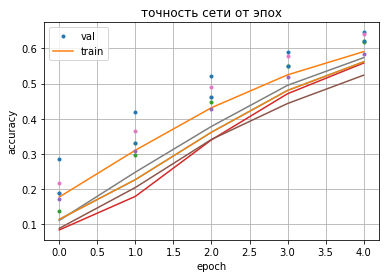

In [127]:
for i in [0,1,2,3,4]:
  bigger_model4 = Sequential([
                              Dense(512, activation='relu', input_shape=(784,)),
                              Dense(512, activation='linear'),
                              Dense(10, activation='sigmoid')
                              ])

  bigger_model4.compile(optimizer='sgd',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

  bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10),epochs=5,
                                        batch_size=20000, validation_split=0.2, verbose = 0
                                      )
  plt.plot(bigger_history4.history['val_accuracy'],'.' )
  plt.plot(bigger_history4.history['accuracy'] )
plt.plot(bigger_history4.history['val_accuracy'],'.' ,label='val')
plt.plot(bigger_history4.history['accuracy'] ,label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

Параметры оптимизаторов


Задача на один класс: to_categorical(train_labels,10)[:,0] 

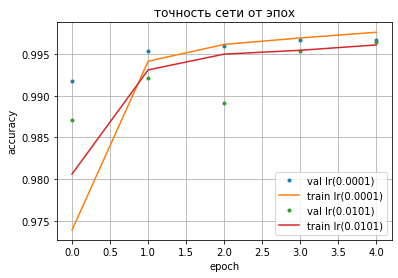

In [128]:
for i in [0,1]:
  bigger_model4 = Sequential([
                              Dense(512, activation='relu', input_shape=(784,)),
                              Dense(512, activation='linear'),
                              Dense(1, activation='sigmoid')  # нейронов на выходе 1 - для одного класса один выход ( бинарный классификатор)
                              ])

  bigger_model4.compile(optimizer= Adam(learning_rate=0.0001+0.01*i, beta_1=0.89) ,
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

  bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10)[:,0],epochs=5,
                                        batch_size=200, validation_split=0.2, verbose = 0
                                      )
  plt.plot(bigger_history4.history['val_accuracy'],'.',label='val lr(' +str(0.0001+0.01*i)+')')
  plt.plot(bigger_history4.history['accuracy'] ,label='train lr(' +str(0.0001+0.01*i)+')')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

In [129]:
bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10)[:,0],epochs=5,
                                        batch_size=200, validation_split=0.2, verbose = 0
                                      )

# Классификация изображений одежды

Давайте разберем использование tensorflow 2 на примере датасета с одеждой. В это датасете будут находиться маленькие изображения на белом фоне, такие как кросовки, футболки и прочее.

В данном случае мы будем использовать High API от TensorFlow

In [130]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras

from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


## Импортируем Fashion MNIST датасет

Мы будет использовать следующий датасет -  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Этот датасет содержит 70,000 черно-белых изображений в 10 категориях. Изображения имеют разрешение 28x28 пикселей.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Долгое время в машинном обучение для программ Hello world использовался датасет MNIST с рукописными цифрами. Данный датасет призван несколько усложнить задачу распознования но также подходит в качестве программы Hello world.

В этом датасете 60 000 тренировочных изображений и 10 000 тестовых.

In [131]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [132]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета 

Давайте посмотрим структуры полученного массива данных:

In [133]:
train_images.shape

(60000, 28, 28)

In [134]:
len(train_labels)

60000

In [135]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [136]:
test_images.shape

(10000, 28, 28)

In [138]:
len(test_labels)

10000

In [139]:
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

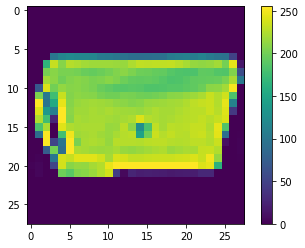

In [140]:
plt.figure()
plt.imshow(train_images[110])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [141]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Посмотрим первые 25 изображений:

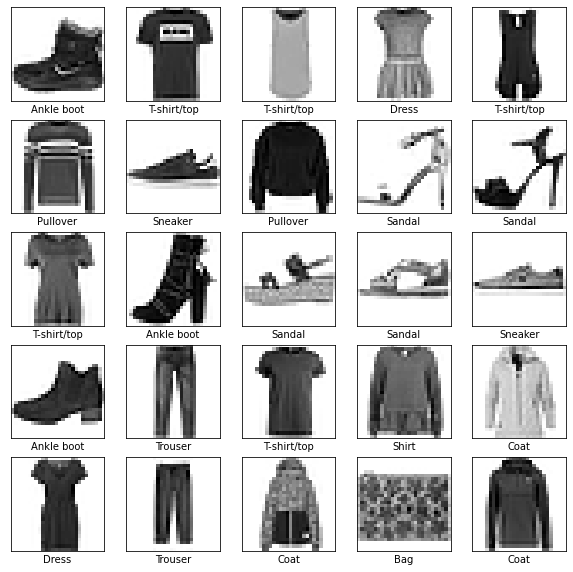

In [142]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [143]:
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
import tensorflow

In [144]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Соберем модель в функциональной форме (функциональное API Keras) 

Сеть собираем как последовательности соединей узлов:
 
 вход -> слой 1 -> слой 2 -> выход

 связь идет через тензоры

In [145]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_59 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [146]:
inputs = Input( shape=(28, 28))
x_1 = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(128, activation='relu')(x_1)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(  inputs,outputs)

In [147]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_61 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [148]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.



### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [149]:
model.fit(train_images, y_train_labels, epochs=3, batch_size=100)

Epoch 1/3
600/600 [==============================] - 2s 3ms/step - loss: 0.5382 - accuracy: 0.8163
Epoch 2/3
600/600 [==============================] - 2s 3ms/step - loss: 0.4044 - accuracy: 0.8571
Epoch 3/3
600/600 [==============================] - 2s 3ms/step - loss: 0.3609 - accuracy: 0.8706


In [150]:
test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3780 - accuracy: 0.8649

Test accuracy: 0.8648999929428101


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых данных и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

In [151]:
y_p = model.predict(test_images[:1,:,:])

In [152]:
y_p

array([[-3.106031 , -9.015266 , -4.430703 , -4.336023 , -4.6308994,
         4.129346 , -3.6946597,  4.022379 ,  1.1179619,  6.111708 ]],
      dtype=float32)

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети - 

In [153]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [154]:
predictions = probability_model.predict(test_images)

In [155]:
predictions[0]

array([7.8250589e-05, 2.1239222e-07, 2.0806068e-05, 2.2872253e-05,
       1.7031223e-05, 1.0858534e-01, 4.3435957e-05, 9.7570091e-02,
       5.3449543e-03, 7.8831691e-01], dtype=float32)

In [156]:
np.argmax(predictions[0])

9

In [157]:
test_labels[0]

9

In [158]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

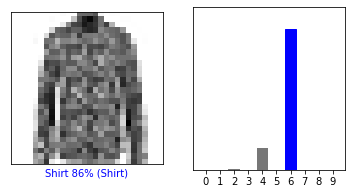

In [159]:
i = 101
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

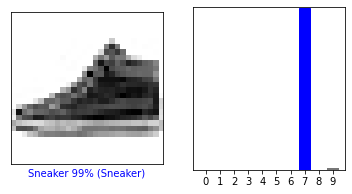

In [162]:
i = 1010
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний - 

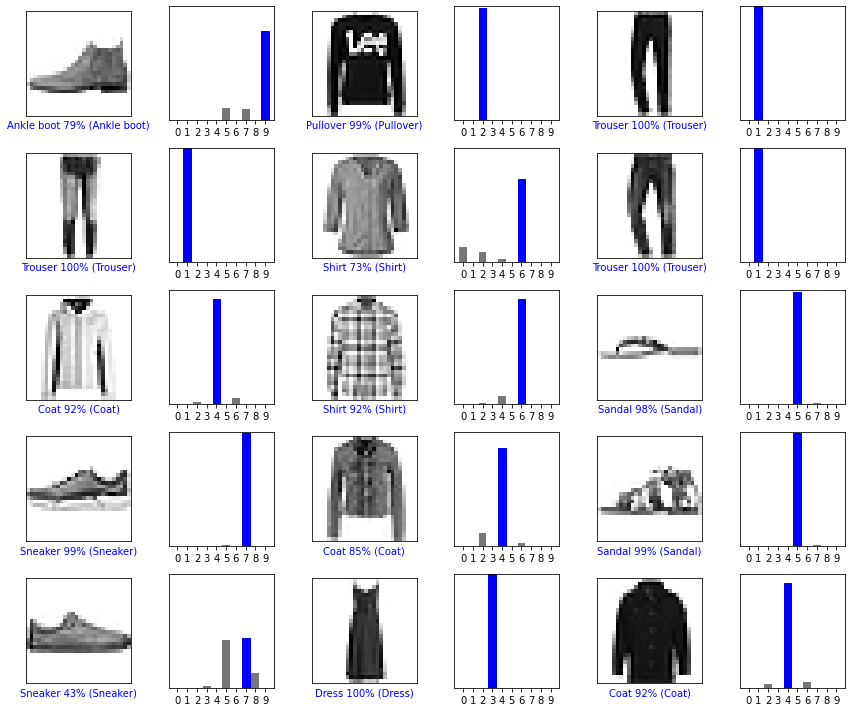

In [163]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети - 

In [164]:

img1 = test_images[1]

print(img1.shape)

(28, 28)


In [165]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img1,0))

print(img.shape)

(1, 28, 28)


In [166]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.33458811e-05 1.72011130e-06 9.88129377e-01 7.39626967e-06
  3.77107435e-03 1.28564395e-10 8.04507267e-03 1.00707386e-13
  1.19156075e-05 3.40530013e-14]]


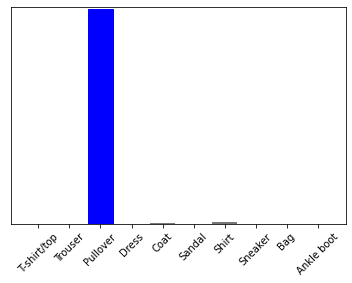

In [167]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [79]:
np.argmax(predictions_single[0])

2

## **Проведем анализ работы модели по слоям**

Состояние узлов в сети по эпохам (пакетам) и слоям можно оценить используя средства tensorflow через объект GradientTape() - исполняет шаг вычисления градиента для модели по ее loss для всех тренируемых весов модели (<имя модели>.trainable_weights) (см. https://www.tensorflow.org/guide/basic_training_loops, https://www.tensorflow.org/api_docs/python/tf/GradientTape)


данные для обучения получим из tensorflow.data.Dataset (https://www.tensorflow.org/guide/data), куда передаем выборку , а на выходе получаем генератор пакетов заданного размера

In [80]:
import tensorflow.nn as nn

In [174]:
# собираем сеть

level =10
inputs = Input(shape=(28,28), name='digits') 
x=Flatten()(inputs)
for i in range(level):
  #x = Dense(64,  name='dense_'+str(i))(x) 
  #x = tf.nn.relu(x)
  x = Dense(64, name='dense_'+str(i))(x)
  #x = nn.sigmoid(x) 
  x = tf.nn.relu(x)
x = Dense(10,name='predictions')(x) 
outputs =nn.softmax(x)
modelg = Model(inputs=inputs, outputs=outputs) 




# Создадим экземпляр оптимизатора. 
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=1e-3) 
# Instantiate a loss function. 
loss_fn = tensorflow.keras.losses.MeanSquaredError() #(from_logits=True) 
# Подготовим тренировочный датасет. 
batch_size = 64 
# Итерируем по эпохам.
grad_log=[]

epochs=2  # учим немного, т.к. задача посмотреть , что происходит с градиентом
for epoch in range(epochs): 
  print('Начинаем эпоху %d' % (epoch,)) 
  # Итерируем по пакетам в датасете. 
   
  for step, (x_batch_train, y_batch_train) in enumerate(zip(train_images[:100,:,:], y_train_labels[:100])):
    # Откроем GradientTape чтобы записать операции # выполняемые во время прямого прохода, 
    #включающего автодифференцирование. 
    with tensorflow.GradientTape() as tape: 
      # Запустим прямой проход слоя. 
      # Операции применяемые слоем к своим 
      # входным данным будут записаны 
      # на GradientTape. 
      loggits = modelg(x_batch_train.reshape((1,28,28))) 
      # loggits для пакета  - выходы модели 
      # Вычислим значение потерь для этого пакета. 
      y_batch_train = y_batch_train.reshape(1,10)
      y_s=y_batch_train.shape
      y  = tensorflow.reshape( y_batch_train,shape=(y_s[0],10,1))
      l = tensorflow.reshape( loggits,shape=(y_s[0],10,1))
      # вызываем лосс
      loss_value = loss_fn(y, l) 
      # Используем gradient tape для автоматического извлечения градиентов 
      # обучаемых переменных относительно потерь. 
      grads = tape.gradient(loss_value, modelg.trainable_weights) 
      g_g=[]
      w_w =[]
      # пишем логи для сохранения значений градиента и веса по одной цепи 
      # (0-й канал распространения активности)
      for g_s in grads:
        # допишем логи значений градиента в зависимости от размера тензора градиента
        if len(g_s.numpy().shape)==1:
         
          g_g.append(g_s.numpy()[0])
        if len(g_s.numpy().shape)==2:
          
          g_g.append(g_s.numpy()[0,0]) 
        if len(g_s.numpy().shape)==3:
          
          g_g.append(g_s.numpy()[0,0,0]) 
        if len(g_s.numpy().shape)==4:
          
          g_g.append(g_s.numpy()[0,0,0,0])  

              
      # добавляем текущие логи по слоям к общей записи
      grad_log.append(g_g)

      # Выполним один шаг градиентного спуска обновив # значение переменных минимизирующих потери. 
      optimizer.apply_gradients(zip(grads, modelg.trainable_weights)) 
      # Пишем лог каждые 200 пакетов. 
      if step % 20 == 0: 
        print('Потери на обучении (для одного пакета) на шаге %s: %s' % (step, float(loss_value))) 
        print('Уже увидели: %s примеров' % ((step + 1) * batch_size))
grad_log=np.array(grad_log)



Начинаем эпоху 0
Потери на обучении (для одного пакета) на шаге 0: 0.09037415683269501
Уже увидели: 64 примеров
Потери на обучении (для одного пакета) на шаге 20: 0.08978477120399475
Уже увидели: 1344 примеров
Потери на обучении (для одного пакета) на шаге 40: 0.09034919738769531
Уже увидели: 2624 примеров
Потери на обучении (для одного пакета) на шаге 60: 0.08974733203649521
Уже увидели: 3904 примеров
Потери на обучении (для одного пакета) на шаге 80: 0.09031617641448975
Уже увидели: 5184 примеров
Начинаем эпоху 1
Потери на обучении (для одного пакета) на шаге 0: 0.09037082642316818
Уже увидели: 64 примеров
Потери на обучении (для одного пакета) на шаге 20: 0.0897778794169426
Уже увидели: 1344 примеров
Потери на обучении (для одного пакета) на шаге 40: 0.09034837782382965
Уже увидели: 2624 примеров
Потери на обучении (для одного пакета) на шаге 60: 0.08974485099315643
Уже увидели: 3904 примеров
Потери на обучении (для одного пакета) на шаге 80: 0.09031476080417633
Уже увидели: 5184 пр

In [175]:
modelg.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 28, 28)]          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_0 (Dense)              (None, 64)                50240     
_________________________________________________________________
tf.nn.relu_10 (TFOpLambda)   (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
tf.nn.relu_11 (TFOpLambda)   (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                416

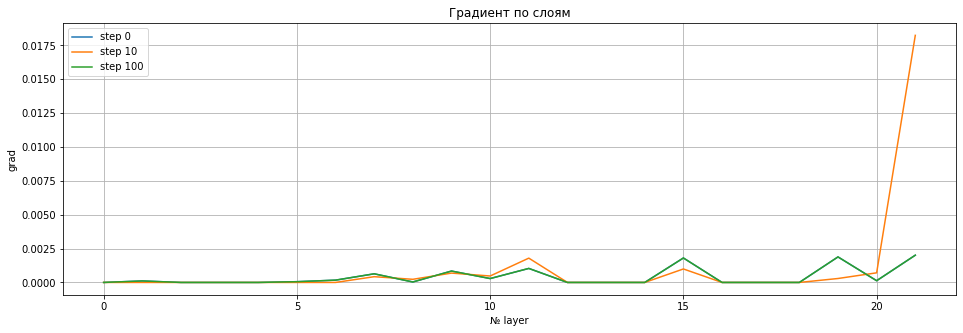

In [176]:
plt.figure(figsize=(16,5))
plt.title('Градиент по слоям')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0,:]),label='step 0')
plt.plot(np.abs(grad_log[10,:]),label='step 10')
plt.plot(np.abs(grad_log[100,:]),label='step 100')
#plt.plot(np.abs(grad_log[700,:]),label='step 700')
plt.legend()
plt.show()

### Сделаем анализ ошибок модели

In [177]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [178]:
y_pred = np.argmax(probability_model.predict(test_images), axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [179]:
CM = confusion_matrix(test_labels,y_pred)
print(CM)

[[770   3  12  45   5   0 155   0  10   0]
 [  2 962   1  27   4   0   2   0   2   0]
 [ 11   1 741  15 146   1  84   0   1   0]
 [ 22  14   8 891  30   0  31   0   4   0]
 [  0   1  74  36 814   1  70   0   4   0]
 [  1   0   0   1   0 952   0  32   2  12]
 [ 99   2  87  41  89   0 672   0  10   0]
 [  0   0   0   0   0  23   0 957   0  20]
 [  1   1   4   9   5   2  20   4 954   0]
 [  0   0   0   1   0  14   1  48   0 936]]


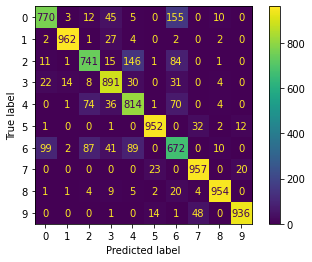

In [180]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=np.arange(10))

disp.plot( values_format ='.3g')
plt.show()

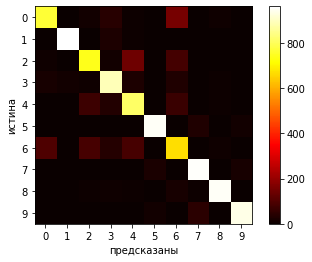

In [181]:
plt.imshow(CM, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.yticks(ticks=np.arange(10))
plt.xticks(ticks=np.arange(10))
plt.xlabel('предсказаны')
plt.ylabel('истина')
plt.show()

Сеть делает ошибки. Можно их попробовать исправить, если сделать комбинацию сетей (ансамбль) . Проверим вариант усреднения.

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание


Реализуем одинаковые сети в разном стиле:
- model1 - линейная модель через список
- model2 - линейная модель через добавление слоев по очереди
- model3 - модель через функциональное описание

У всех 3-х сетей предпоследний слой линейный (это не правильно для классификации и сделано, что бы модель была совсем простой)




In [182]:
# заполняем модель списком
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

# заполняем модель , добавляя слои последовательно 
model2 = keras.Sequential()
model2.add(keras.layers.Flatten(input_shape=(28, 28)))
model2.add(keras.layers.Dense(256, activation='linear'))
model2.add(keras.layers.Dense(10, activation='softmax'))


# Заполняем модель, формируя граф передачи тензоров
x_input = keras.layers.Input(shape=(28,28))
x3 = keras.layers.Flatten()(x_input)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x_output = keras.layers.Dense(10, activation='softmax')(x3)
model3=keras.models.Model(x_input,x_output)

model1.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist1=model1.fit(train_images, train_labels, epochs=5)
hist2=model2.fit(train_images, train_labels, epochs=5)
hist3=model3.fit(train_images, train_labels, epochs=5)



Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 4s 2ms/step - loss: 1.2599 - accuracy: 0.6640
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7644 - accuracy: 0.7548
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6559 - accuracy: 0.7746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6004 - accuracy: 0.7921
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5643 - accuracy: 0.8046
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6000 - accuracy: 0.7967
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4789 - accuracy: 0.8322
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4581 - accuracy: 0.8422
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4458 - accuracy: 0.8454
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4379 - accuracy: 0.8481


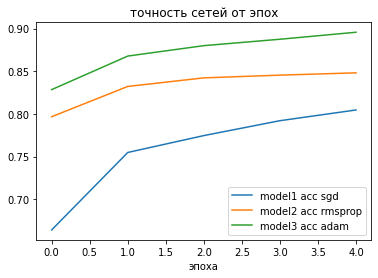

In [183]:
plt.plot(hist1.history['accuracy'],label='model1 acc sgd')
plt.plot(hist2.history['accuracy'],label='model2 acc rmsprop')
plt.plot(hist3.history['accuracy'],label ='model3 acc adam')
plt.title('точность сетей от эпох')
plt.xlabel('эпоха')
plt.legend()
plt.show()

In [184]:
y_pred1 = np.argmax(model1.predict(test_images),axis=1)
y_pred2 = np.argmax(model2.predict(test_images),axis=1)
y_pred3 = np.argmax(model3.predict(test_images),axis=1)

CM1 = confusion_matrix(test_labels,y_pred1)
CM2 = confusion_matrix(test_labels,y_pred2)
CM3 = confusion_matrix(test_labels,y_pred3)

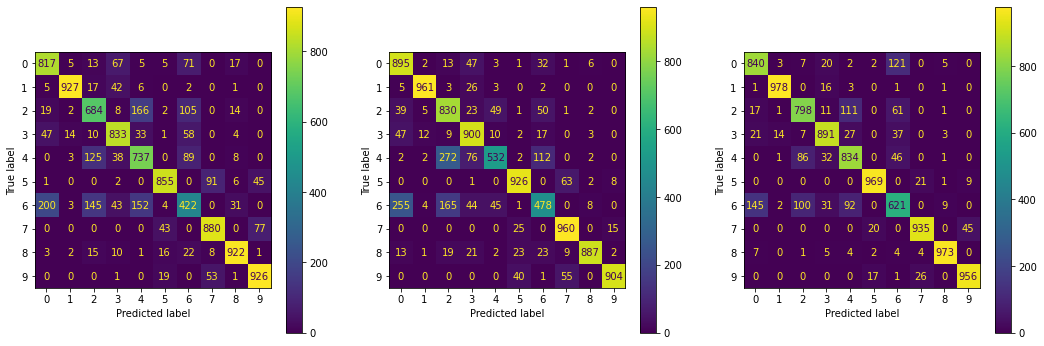

In [185]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
disp1 = ConfusionMatrixDisplay(confusion_matrix=CM1, display_labels=np.arange(10))
disp1.plot( ax=ax1, values_format ='.3g')
disp2 = ConfusionMatrixDisplay(confusion_matrix=CM2, display_labels=np.arange(10))
disp2.plot( ax=ax2, values_format ='.3g')
disp3 = ConfusionMatrixDisplay(confusion_matrix=CM3, display_labels=np.arange(10))
disp3.plot( ax=ax3, values_format ='.3g')
plt.show()

In [186]:
# сохранить модели на диск.
model1.save_weights('model1.h5')
model2.save_weights('model2.h5')
model3.save_weights('model3.h5')
# прочитать модели с диска (перед этим, нужно положить их в каталог для работы виртуальной машины Колаборатории):
# model.load_weights('model.h5')

Выгрузим на локальную машину нашу модель

In [187]:
from google.colab import files

files.download('model1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [94]:
x3

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense_35')>

Сделаем предсказание на тестовом изображении

In [188]:
y_pred = model3.predict(test_images)
y_pred_arg = np.argmax(y_pred, axis=1)


Отобразим значения на выходах сети (10 выходов - 10 точек графика)

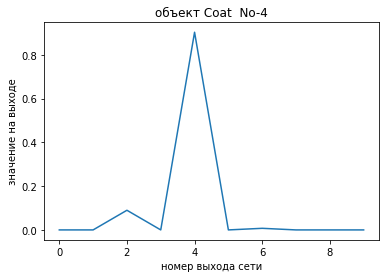

In [189]:
N = 10 
plt.plot(y_pred[N,:])
plt.title('объект ' +class_names[test_labels[N]]+ '  No-'+str(test_labels[N]))
plt.xlabel('номер выхода сети')
plt.ylabel('значение на выходе')
plt.show()

In [190]:
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 - 1s - loss: 0.3365 - accuracy: 0.8795


### **Ансамбль сетей**

Использование функционального API для построения сложных сетей

In [206]:
input1 = keras.layers.Input(shape=(28, 28))
x1= keras.layers.Flatten()(input1)
x1 = keras.layers.Dense(128, activation='relu')(x1)
x1 =keras.layers.Dense(10, activation='softmax')(x1)

model11 =keras.models.Model(inputs=input1,outputs=x1)

input2 = keras.layers.Input(shape=(28, 28))
x2= keras.layers.Flatten()(input1)
x2 = keras.layers.Dense(256, activation='relu')(x2)
x2=keras.layers.Dense(10, activation='softmax')(x2)

model22 =keras.models.Model(inputs=input1,outputs=x2)

x3= keras.layers.Flatten()(input1)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x3=keras.layers.Dense(10, activation='softmax')(x3)


model33 =keras.models.Model(inputs=[input1],outputs=x3)

# усредняем выходы сетей
out_all = keras.layers.Average()([model11.output,model22.output,model33.output])
out_all = keras.layers.Softmax()(out_all)

model_all=keras.models.Model(inputs =[input1],outputs =out_all)#, input2
model_all.compile(optimizer=tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model11.load_weights('model1.h5')
model22.load_weights('model2.h5')
model33.load_weights('model3.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [193]:
tf.keras.optimizers.Adam()

In [194]:
model_all.summary()

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_19 (Flatten)            (None, 784)          0           input_6[0][0]                    
__________________________________________________________________________________________________
flatten_20 (Flatten)            (None, 784)          0           input_7[0][0]                    
___________________________________________________________________________________________

In [195]:
from tensorflow.keras.utils import plot_model

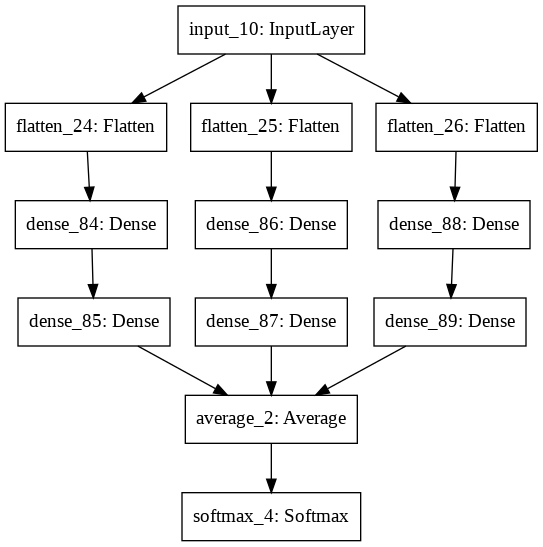

In [207]:
plot_model(model_all,to_file='new_model-all.png')

In [197]:
predictions_single=model_all.predict([img,img])

print(predictions_single)

[[0.0899722  0.08692221 0.20904002 0.08794323 0.08895252 0.08672227
  0.090129   0.08671697 0.08689157 0.08671004]]


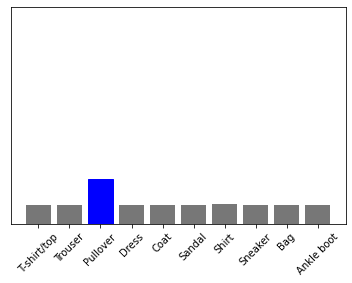

In [198]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [199]:
test_loss, test_acc = model_all.evaluate([test_images,test_images],  test_labels, verbose=2)

313/313 - 1s - loss: 2.2198 - accuracy: 0.8529


In [200]:
model11.save('model_11.h5')

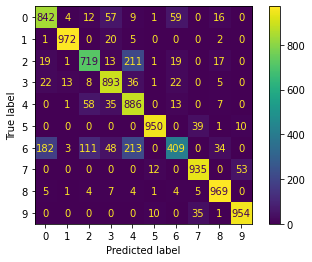

In [201]:
y_pred_all = np.argmax(model_all.predict([test_images,test_images]),axis=1)

CM_all = confusion_matrix(test_labels,y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(  values_format ='.3g')
plt.show()

In [202]:
hist1=model_all.fit([train_images,train_images], train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1998 - accuracy: 0.8728
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1962 - accuracy: 0.8757
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1951 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1944 - accuracy: 0.8788
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1940 - accuracy: 0.8791


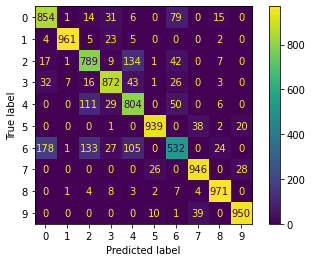

In [204]:
y_pred_all = np.argmax(model_all.predict([test_images,test_images]),axis=1)

CM_all = confusion_matrix(test_labels,y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(  values_format ='.3g')
plt.show()

In [111]:
from tensorflow.keras.layers import Concatenate 

In [112]:
input6 = keras.layers.Input( shape=(28, 28) )
x6= keras.layers.Flatten()(input6)
x6 = keras.layers.Dense(256, activation='relu')(x6)
x6=keras.layers.Dense(1, activation='sigmoid')(x6)


model6 =Model(inputs=input6,outputs=x6)
model6.compile(optimizer=tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model6.fit(train_images,y_train_labels[:,6], epochs = 10, validation_split = 0.2)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1946 - accuracy: 0.9184 - val_loss: 0.1599 - val_accuracy: 0.9296
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1589 - accuracy: 0.9322 - val_loss: 0.1571 - val_accuracy: 0.9299
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1481 - accuracy: 0.9369 - val_loss: 0.1398 - val_accuracy: 0.9395
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1399 - accuracy: 0.9418 - val_loss: 0.1440 - val_accuracy: 0.9405
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1343 - accuracy: 0.9426 - val_loss: 0.1420 - val_accuracy: 0.9381
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1315 - accuracy: 0.9442 - val_loss: 0.1287 - val_accuracy: 0.9482
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1265 - accuracy: 0.9464 - val_loss: 0.1278 - val_accuracy:

## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    
    
</ol>



## Набор данных для последнего ДЗ

- COVID 19 диагностика https://www.kaggle.com/andrewmvd/covid19-ct-scans

- Распознавание изображений цифр в представлении языка жестов https://www.kaggle.com/ardamavi/sign-language-digits-dataset

## Дополнительные материалы

<ol>
    <li>www.tensorflow.org/api_docs</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.tensorflow.org/</li>
    <li>https://www.tensorflow.org/tutorials/keras/classification</li>
    <li>Singh P., Manure A. - Learn TensorFlow 2.0 - 2020</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Википедия</li>
    
</ol>